<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/13%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chapter 6 차원 축소**

**1. 차원 축소(Dimension Reduction) 개요**

* 차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 됨
* 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐, 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 큼
* 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
* 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터 해석 가능
* 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있음
* 차원 축소 
  * 피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
  * 피처(특성) 추출(feature extraction): 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것(새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다)
    * 피처(특성) 추출은 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
    * 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미
* 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아님. 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있음
* PCA, SVD, NMF: 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘
  * 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아 주는 데 위 알고리즘이 잘 활용됨
  * 이미지 데이터 - 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있음. 이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시 과적합 영향력이 작아져서 원본 데이터로 예측하는 것보다 예측 성능 더 끌어 올릴 수 있음
  * 텍스트 문서 - 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있음. SVD와 NMF는 이러한 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용됨


**2. PCA(Principal COmponent Analysis)**

**PCA 개요**
* PCA: 가장 대표적인 차원 축소 기법, 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal COmponent)을 추출해 차원을 축소하는 기법
* PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연
* 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)

키와 몸무게 2개의 피처를 가지고 있는 데이터 세트가 다음과 같이 구성돼 있다고 가정

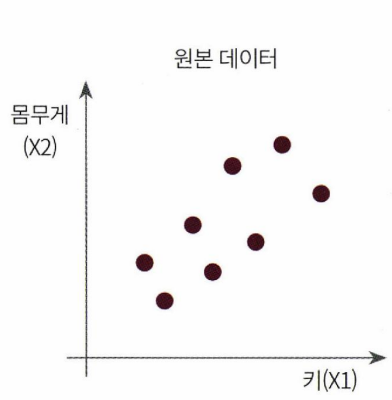

이 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소를 할 수 있음

데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식

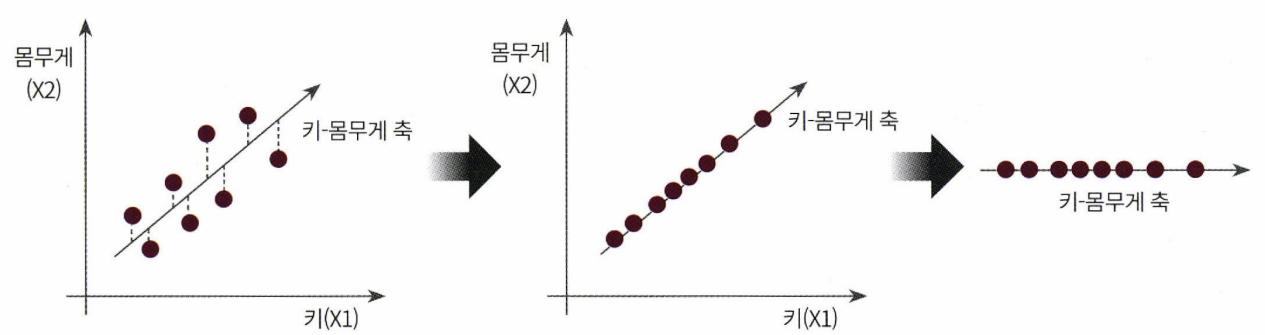

PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함, 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성

이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨

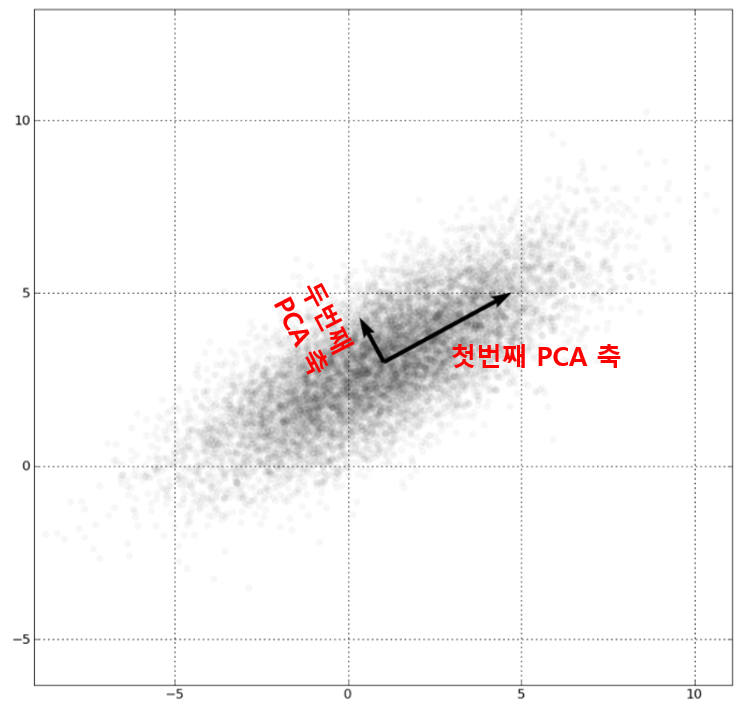

* PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법
* PCA 선형대수 관점에서 해석
  * 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
  * 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
  * 고윳값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄
  * 선형 변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것. 이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것
  * 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미. 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
  * 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭. 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음(ex. 2x2 행렬은 두 개의 고유벡터를 가질 수 있음)
  * 공분산 행렬은 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmetric Matrix)
    * 정방행렬: 열과 행이 같은 행렬
    * 대칭행렬: 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬
    * 공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬
    * 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방행렬로 대각화할 수 있음
  * 입력 데이터의 공분산 행렬을 C라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해 가능
    * P: nxn 직교행렬, ∑: nxn 정방행렬, Pᵀ: 행렬 P의 전치행렬 

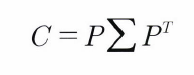

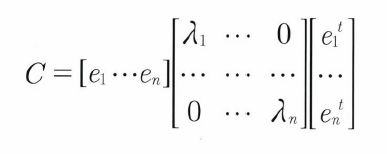

* 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA

* PCA 과정
   1. 입력 데이터 세트의 공분산 행렬 생성
   2. 공분산 행렬의 고유벡터와 고유값 계산
   3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출
   4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

In [ ]:
# 붓꽃(iris) 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


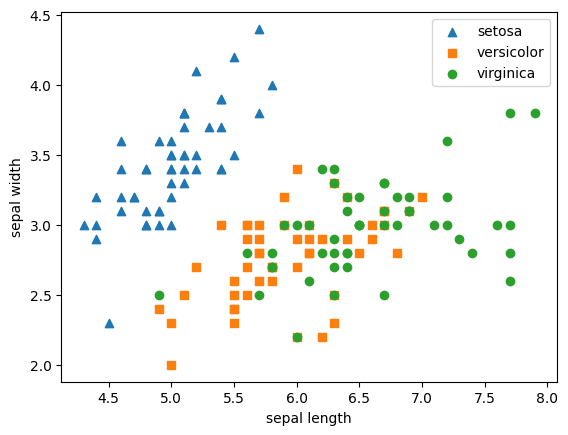

In [ ]:
# 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화
# sepal length와 sepal width를 X축, Y축으로

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()  

→ setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포돼 있음

→ versicolor와  virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건

In [ ]:
# PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화

# 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환 필요
# 사이킷런의 StandardScaler 이용해 평균 0, 분산 1인 표준정규분포로 iris 데이터 세트의 속성값 변환
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
# 스케일링 적용된 데이터 세트에 PCA 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 trasnform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


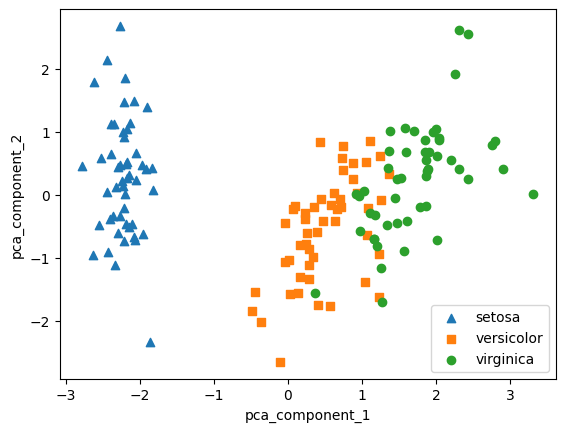

In [ ]:
# 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

→ PCA로 변환한 후에도 pca_component_1 축을 기반으로 setosa 품종은 명확하게 구분 가능

→ versicolor와 virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분됨

→ PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문

In [ ]:
# PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인
# PCA 객체의 explained_variance_ratio_ 속성: 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


→ 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9% 차지, 두 번째인 pca_component_2가 약 22.8% 차지

→ 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음

In [ ]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류 적용한 후 결과 비교
# Estimator는 RandomForestClassifier 이용

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


→ 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음

→ 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도 원본 데이터 대비 10% 하락. 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 좀 더 많은 피처 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤 예측 영향도 어떻게 되는지 변환된 PCA 데이터 세트에 기반해 비교

# 데이터 세트 DataFrame으로 로딩
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/esaa/data/credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


→ 신용카드 데이터 세트 30000개의 레코드와 24개의 속성 가지고 있음

→ 'default payment next month' 속성이 Target 값으로 '다음달 연체 여부'를 의미. '연체'일 경우 1, '정상납부'가 0

In [ ]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

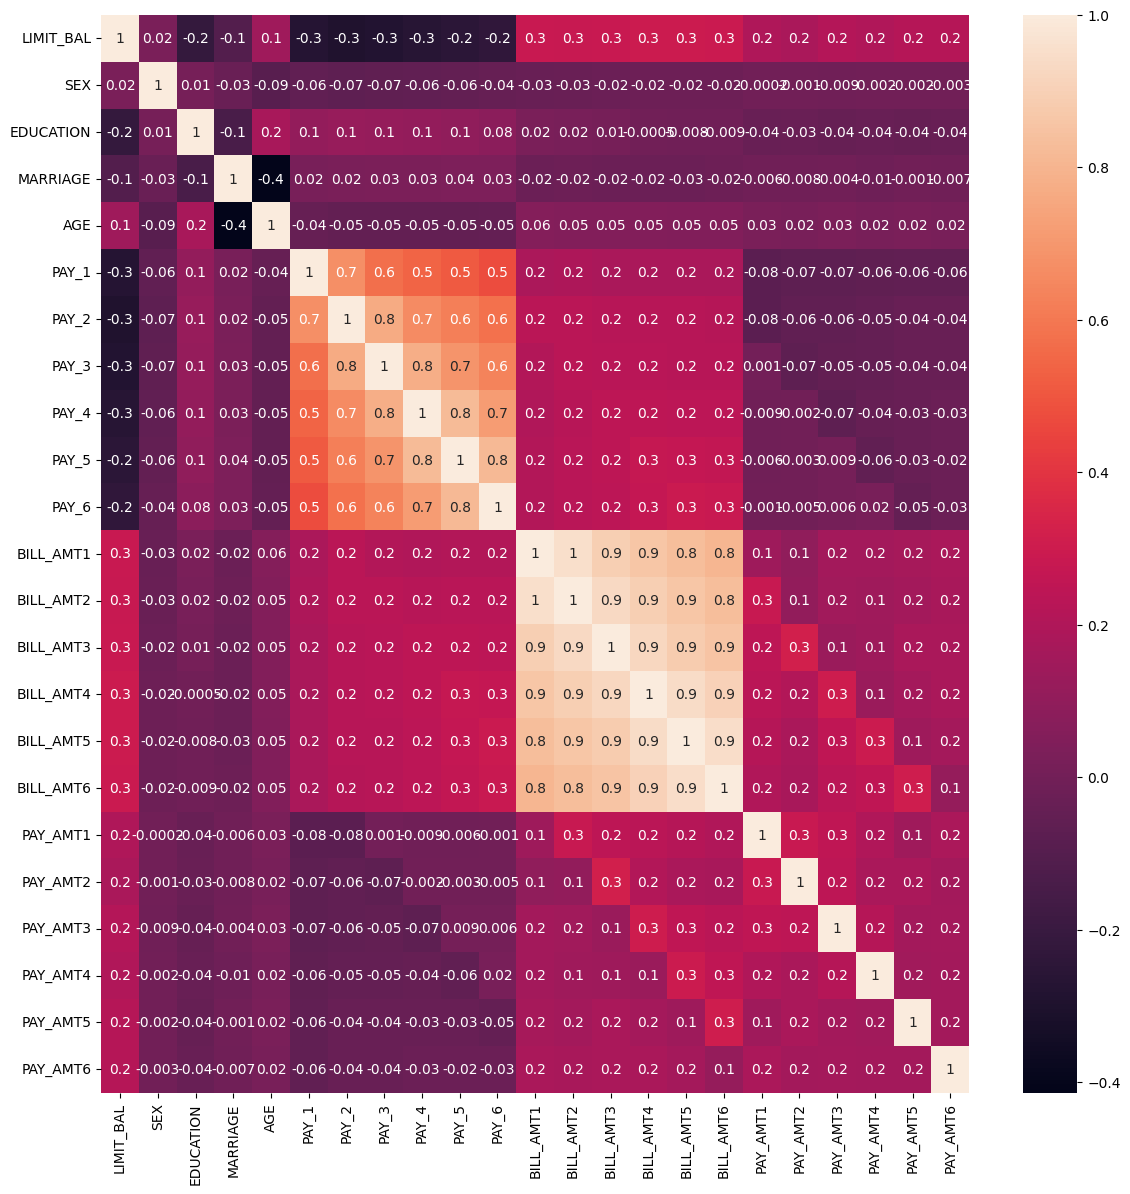

In [ ]:
# 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도 매우 높음 → corr() 이용해 각 속성 간의 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

→ BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음

→ 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음

In [ ]:
# BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보기
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BiLL_AMT1 ~ BILL_ATM6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


→ 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있음. 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도 매우 높음

In [ ]:
# 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 상호 비교

# 원본 데이터 세트에 랜덤 포레승트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [ ]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측 적용
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7927 0.7989 0.8017]
PCA 변환 데이터 세트 평균 정확도: 0.7978


→ 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생 - PCA의 뛰어난 압축 능력!!

**3. LDA(Linear Discriminant Analysis**

**LDA 개요**
* LDA: 선형 판별 분석법으로 불리며, PCA와 매우 유사
* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함
* PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
* LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하느 ㄴ방식으로 차원 축소
* 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

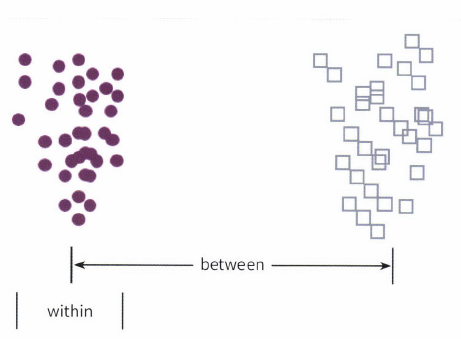

* LDA 과정
  1. 클래스 내부와 클래스 간 분산 행렬 구함(이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함)
  2. 클래스 내부 분산 행렬SW, 클래스 간 분산 행렬 SB라고 하면 다음 식으로 두 행렬을 고유벡터로 분해 가능
  3. 고유값이 가장 큰 순으로K개(LDA 변환 차수만큼) 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

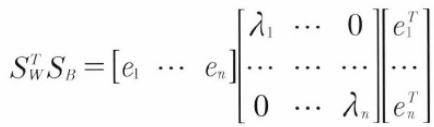

**붓꽃 데이터 세트에 LDA 적용하기**

In [ ]:
# 붓꽃 데이터 세트 로드, 표준 정규 분포로 스케일링
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
# 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환
# LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이므로 클래스의 결정값이 변환 시에 필요
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)  # 결정값이 입력됐음에 유의
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


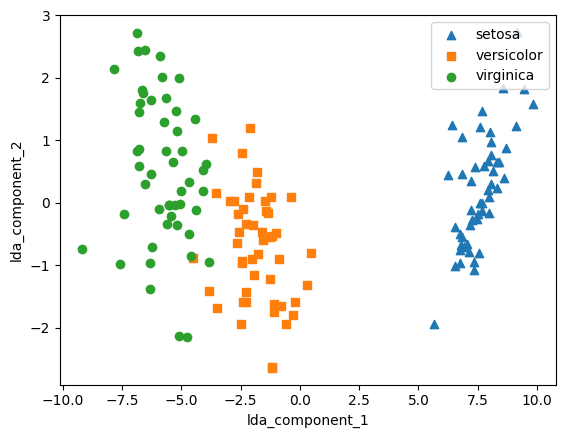

In [ ]:
# LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모야으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()